2vqe_f.sq
3t1y_f.sq


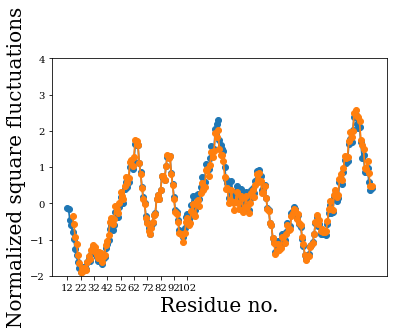

In [25]:
import sys
import os
#import pylab as pl
import numpy as np
from matplotlib import *
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspc
from sklearn.preprocessing import *
from sklearn import preprocessing
from tkinter import Tk


from scipy import stats

#matplotlib.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']


plt.rcParams["font.family"] = "serif"

direc = '/home/sneha/work/ribo_review/'


for filename in sorted(os.listdir(direc)):
    if filename.endswith(".sq"):
        lis1, lis2 ,lis3,lis4,lisn,chains, lis = [], [], [], [], [],[],[]
        lis5 = {}
        lis0, lis6 = {}, {}
        d1 = {}
        with open(filename) as infile:
            for line in infile:
                #print (line)
                lis = line.split()
                d1[float(lis[0])] = lis[2]
                lis1.append(float(lis[0]))
                lis2.append(lis[2])
                lis3.append(float(lis[1]))
                lis4.append(lis[3])
                #lis4.app
        chains = sorted(set(lis2))

        for o in chains:
            lis0[(o)] = []
            lis6[(o)] = []
            lis5[(o)] = []
            for j in range(0, len(lis1)):
                if lis2[j] == o:
                    lis0[o].append(lis1[j])
                    lis6[o].append(lis4[j])
            x = np.array(lis0[o])
            result = stats.zscore(x)
            y = np.reshape(x,(-1,1))
            #result = scale(y)
            
            if o == 'B':
                #plt.subplot(321)
                #plt.legend([filename], fontsize = 15)
                #plt.plot(lis4[o],result,linewidth=1.75)
                #print (lis6[o])
                plt.plot(lis6[o],result,linewidth = 1.75,marker='o')
                print (filename)
                #for i in result:print (i)
                
                #plt.legend([ "30S",
                             #"free_mRNA",
                            # "free_mRNA_unbound",
                             #"30S_IC",
                            # "30S_without_IF_IC",
                           # "70S_IC",
                            # "α1α2β_RuB",
                             #"α1α2β'_RuB",
                             #"α1α2ββ'_RuB",
                            #"α1α2ββ'ω_RuB",
                           #  "α1α2ββ'ωσ_RuB",
                           # "α1α2ββ'ωσNA_RuB"],fontsize = 20)
                #plt.title("Ribosomal Protein S6", fontsize = 20)
                plt.xlabel('Residue no.', fontsize = 20)
                plt.ylabel('Normalized square fluctuations', fontsize = 20)
                #plt.ylabel('Normalized square fluctuations', fontsize = 20)
                #plt.ylim(ymin * scale_factor, ymax * scale_factor)
                rin = result
                plt.xticks(np.arange(0,100,10))
                #plt.xlim(0,100)
                #matplotlib.axes.Axes.set_xlim(79,113)
                plt.ylim(-2,4)
                
plt.show()


@> 1834 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Hessian was built in 3.41s.
@> 20 modes were calculated in 8.45s.


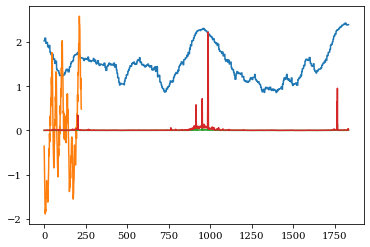

In [64]:
from prody import *
import matplotlib.pyplot as plt
pdb = parsePDB("3t1y_f.pdb",chain = 'B')
pd = pdb.select("name CA")
anm_protein = ANM(pdb)
anm_protein.buildHessian(pdb)
anm_protein.calcModes()
d = calcTempFactors(anm_protein,pdb)
e = calcSqFlucts(anm_protein)
a = pdb.getBetas()
plt.plot(a/60)
plt.plot(rin)
plt.plot(e)
plt.plot(d/6000)

In [68]:
writePDB('an.pdb',pd,betas=rin)
writePDB('an_2.pdb',pd,betas=e)

'an_2.pdb'